<a href="https://colab.research.google.com/github/Kamal-S-09/GAN-Naan-Mudhalvan-Handwritten-Digit-Generation-Project/blob/main/GAN_for_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(-1, 784)

# Generator
generator = Sequential([
    Dense(128, input_dim=100),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(256),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(512),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(784, activation='tanh')
])

# Discriminator
discriminator = Sequential([
    Dense(512, input_dim=784),
    LeakyReLU(0.2),
    Dense(256),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combined network
discriminator.trainable = False
gan_input = generator.input
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Create directory if it doesn't exist
if not os.path.exists('generated_images'):
    os.makedirs('generated_images')

# Training
epochs, batch_size, half_batch = 10000, 64, 32

for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images, noise = X_train[idx], np.random.normal(0, 1, (half_batch, 100))

    d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(generator.predict(noise), np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    gan_loss = gan.train_on_batch(noise, np.ones((half_batch, 1)))  # Adjusted labels to half_batch

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, D Loss: {d_loss}, G Loss: {gan_loss}")

    if epoch % 1000 == 0:
        img = generator.predict(np.random.normal(0, 1, (1, 100))).reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.savefig(f"generated_images/gan_image_{epoch}.png")
        plt.close()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step
Epoch: 5100, D Loss: 0.5702731013298035, G Loss: 2.1830849647521973
1/1 [==============================] - 0s 26ms/step
Epoch: 5200, D Loss: 0.18220632523298264, G Loss: 4.1050920486450195
1/1 [==============================] - 0s 24ms/step
Epoch: 5300, D Loss: 0.21033670753240585, G Loss: 3.0455970764160156
1/1 [==============================] - 0s 21ms/step
Epoch: 5400, D Loss: 0.46438831090927124, G Loss: 3.378178596496582
1/1 [==============================] - 0s 25ms/step
Epoch: 5500, D Loss: 0.2133258730173111, G Loss: 3.2491705417633057
1/1 [==============================] - 0s 28ms/step
Epoch: 5600, D Loss: 0.40057191997766495, G Loss: 2.8772528171539307
1/1 [==============================] - 0s 23ms/step
Epoch: 5700, D Loss: 0.20467720180749893, G Loss: 3.5519495010375977
1/1 [==============================] - 0s 24ms/step
Epoch: 5800, D Loss: 0.4828413426876068, G Loss: 3.04

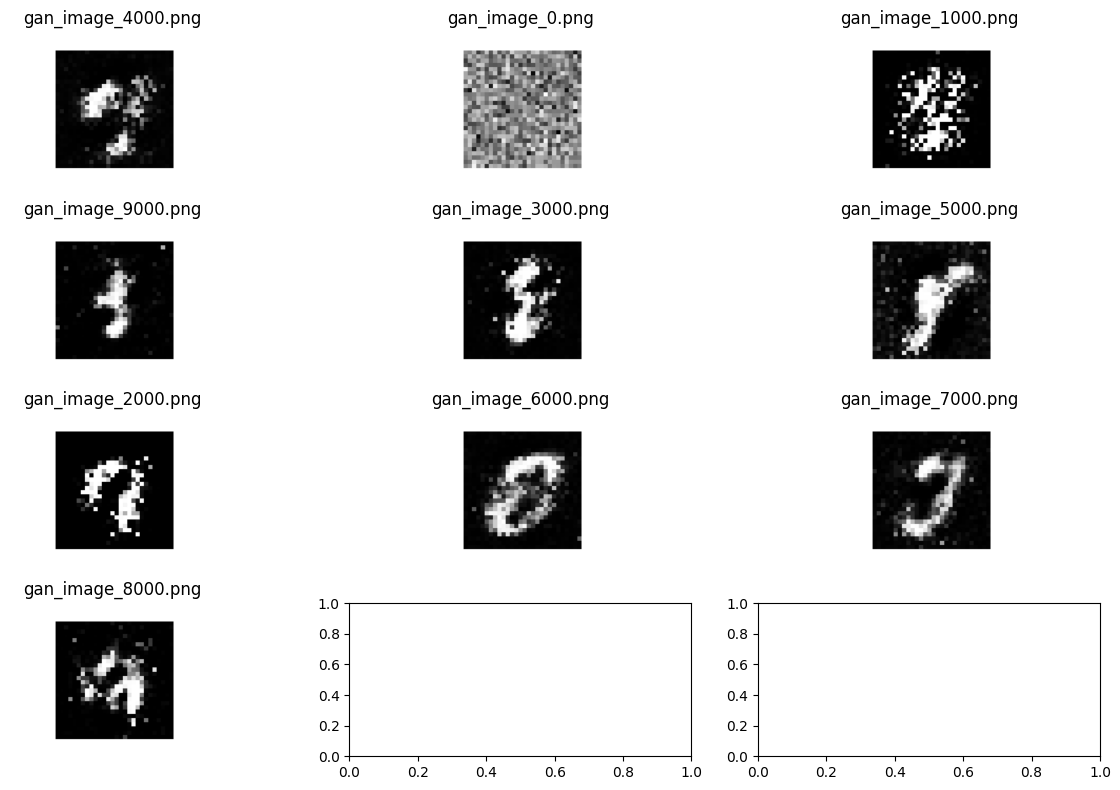

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

folder_path = '/content/generated_images/'


image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

num_images = len(image_files)
num_cols = 3
num_rows = -(-num_images // num_cols)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))


for i, image_file in enumerate(image_files):
    img = mpimg.imread(os.path.join(folder_path, image_file))
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(image_file)  # Set title as the filename


plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 112ms/step
Epoch: 0, D Loss: 0.7707490921020508, G Loss: 0.6201801300048828
1/1 [==============================] - 0s 21ms/step
Epoch: 100, D Loss: 0.05631717763390043, G Loss: 10.279674530029297
1/1 [==============================] - 0s 32ms/step
Epoch: 200, D Loss: 0.17968937964178622, G Loss: 10.436555862426758
1/1 [==============================] - 0s 32ms/step
Epoch: 300, D Loss: 0.5800220329069816, G Loss: 5.156395435333252
1/1 [==============================] - 0s 24ms/step
Epoch: 400, D Loss: 0.06880075857043266, G Loss: 5.6067094802856445
1/1 [==============================] - 0s 29ms/step
Epoch: 500, D Loss: 0.14135084673762321, G Loss: 4.228246212005615
1/1 [==============================] - 0s 36ms/step
Epoch: 600, D Loss: 0.19267965853214264, G Loss: 3.8711817264556885
1/1 [==============================] - 0s 35ms/step
Epoch: 700, D Loss: 0.09387102164328098, G Loss: 3.134052276611328
1/1 [==============================] - 0s 28ms

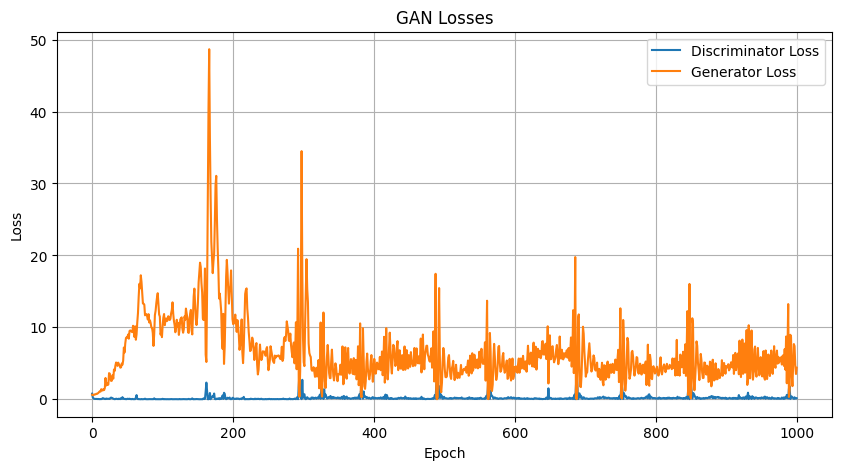

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(-1, 784)

# Generator
generator = Sequential([
    Dense(128, input_dim=100),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(256),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(512),
    LeakyReLU(0.2),
    BatchNormalization(),
    Dense(784, activation='tanh')
])

# Discriminator
discriminator = Sequential([
    Dense(512, input_dim=784),
    LeakyReLU(0.2),
    Dense(256),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combined network
discriminator.trainable = False
gan_input = generator.input
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Create directory if it doesn't exist
if not os.path.exists('generated_images'):
    os.makedirs('generated_images')

# Training
epochs, batch_size, half_batch = 1000, 64, 32

# Lists to store loss values for plotting
d_losses = []
gan_losses = []

for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images, noise = X_train[idx], np.random.normal(0, 1, (half_batch, 100))

    d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(generator.predict(noise), np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    gan_loss = gan.train_on_batch(noise, np.ones((half_batch, 1)))  # Adjusted labels to half_batch

    d_losses.append(d_loss)
    gan_losses.append(gan_loss)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, D Loss: {d_loss}, G Loss: {gan_loss}")

    if epoch % 1000 == 0:
        img = generator.predict(np.random.normal(0, 1, (1, 100))).reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.savefig(f"generated_images/gan_image_{epoch}.png")
        plt.close()

# Plot the generator and discriminator loss
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(gan_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('GAN Losses')
plt.grid(True)
plt.show()
